In [1]:
base_directory = '/home/shoaib/ZTFDataChallenge/'

import sys
sys.path.insert(0, base_directory + 'SOM/')

from QNPY_SOM_LC_Clustering import *

In [2]:
import numpy as np
import pandas as pd

from tqdm.auto import tqdm
tqdm.pandas(desc="Lightcurves Processed")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.rcParams['axes.grid'] = False
# plt.style.use('seaborn-v0_8-colorblind')

In [7]:
### Loading the lightcurves by name
lightcurves_by_name = pd.read_pickle(base_directory + 'lightcurves_by_name_1day_binned.pkl')[['name', 'r_lightcurve','r_n_good_det','r_timespan_good','g_lightcurve','g_n_good_det','g_timespan_good']]
lightcurves_by_name = lightcurves_by_name.dropna(axis=0)
# lightcurves_by_name = lightcurves_by_name.query("type in @qso_types")
### Sampling to save memory
lightcurves_by_name = lightcurves_by_name.sample(1000)

### Loading the lightcurves by OID
# lightcurves_by_oid = pd.read_pickle(base_directory + 'lightcurves_by_oid_1day_binned.pkl')[['oid_alerce', 'lightcurve','n_good_det','timespan_good']]
# lightcurves_by_oid = lightcurves_by_oid.dropna(axis=0)
# lightcurves_by_oid = lightcurves_by_oid.query("type in @qso_types")
### Sampling to save memory
# lightcurves_by_oid = lightcurves_by_oid.sample(frac=0.1)

In [8]:
lcs = lightcurves_by_name['r_lightcurve'].values

In [9]:
scaled_padded_lcs = np.array([scale_curve(LC) for LC in tqdm(lcs, desc='Scaling')], dtype='object')

Scaling:   0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
time_bin_width = 1
timespan_max = 1150

scaled_padded_lcs, time_bins = pad_lightcurves(scaled_padded_lcs, timespan_max=timespan_max, bin_width=time_bin_width)

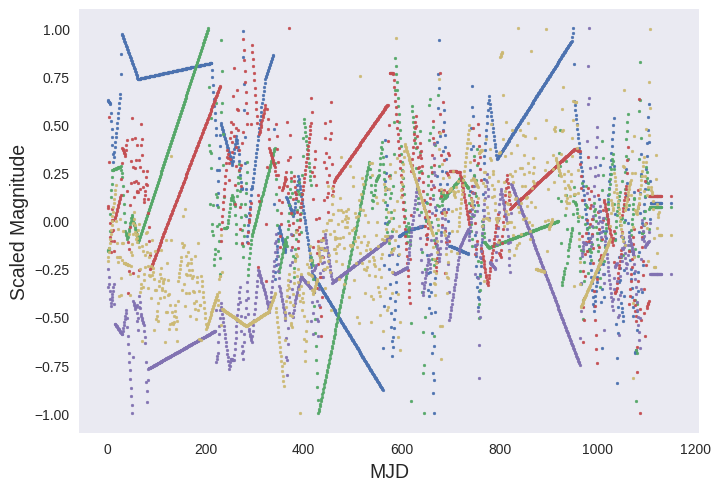

In [ ]:
### Let's see some of these scaled and padded lightcurves

n_curves = 5
subset_idxs = np.random.choice(len(scaled_padded_lcs), n_curves, replace=False)
lcs_subset = scaled_padded_lcs[subset_idxs]

for mag_array in lcs_subset:
    plt.scatter(time_bins, mag_array, s=4)

plt.ylabel('Scaled Magnitude', size=14)
plt.xlabel('MJD', size=14)

plt.show()


## Making SOMs

### $(1 \times 3)$

In [ ]:
som_x = 1
som_y = 3
use_epochs = False
num_iterations_per_batch = 10_000
batch_size = 5
log_stat_every_n_batch = 1
model_save_dir = base_directory + 'SOM/LCs_by_Name_Clustering/'
model_name = f'som_{som_x}x{som_y}_{num_iterations_per_batch}Iters_{use_epochs}Epochs_{batch_size}BS_{log_stat_every_n_batch}Stat_Freq'
model_save_path = model_save_dir + model_name

som_model, q_error, t_error, indices_to_plot = SOM_1D(scaled_padded_lcs,
                                                      model_save_path=model_save_path,
                                                      n_random_selections=None,
                                                      som_x=som_x,
                                                      som_y=som_y,
                                                      use_epochs=use_epochs,
                                                      pca_init=False,
                                                      num_iterations_per_batch=num_iterations_per_batch,
                                                      batch_size=batch_size,
                                                      log_stat_every_n_batch=log_stat_every_n_batch,
                                                    )

Training Batch: 100it [00:48,  2.08it/s]


(<minisom.MiniSom at 0x7fd676078920>,
 [np.float64(11.495101894172057),
  np.float64(12.07158594475888),
  np.float64(12.016688995122596),
  np.float64(12.48070082224061),
  np.float64(12.03571417813021),
  np.float64(12.041276108054321),
  np.float64(12.576607208252183),
  np.float64(11.66244543785005),
  np.float64(12.218493081799071),
  np.float64(11.836940633610624),
  np.float64(12.069776290149512),
  np.float64(12.708875459394651),
  np.float64(11.856061823273013),
  np.float64(11.887717392126936),
  np.float64(11.475097693038888),
  np.float64(11.817323352652906),
  np.float64(12.045011290475987),
  np.float64(11.999086917258458),
  np.float64(12.58561686615382),
  np.float64(11.545467143160746),
  np.float64(11.851404230416346),
  np.float64(11.90077169086034),
  np.float64(11.845513448500755),
  np.float64(11.980525567082449),
  np.float64(12.377613416861678),
  np.float64(12.102000469191841),
  np.float64(12.300734195928868),
  np.float64(12.066777991306074),
  np.float64(11.

In [ ]:
som_x = 6
som_y = 6
use_epochs = False
num_iterations_per_batch = 10_000
batch_size = 5
log_stat_every_n_batch = 1
model_save_dir = base_directory + 'SOM/LCs_by_Name_Clustering/'
model_name = f'som_{som_x}x{som_y}_{num_iterations_per_batch}Iters_{use_epochs}Epochs_{batch_size}BS_{log_stat_every_n_batch}Stat_Freq'
model_save_path = model_save_dir + model_name

som_model, q_error, t_error, indices_to_plot = SOM_1D(scaled_padded_lcs,
                                                      model_save_path=model_save_path,
                                                      n_random_selections=None,
                                                      som_x=som_x,
                                                      som_y=som_y,
                                                      use_epochs=use_epochs,
                                                      pca_init=False,
                                                      num_iterations_per_batch=num_iterations_per_batch,
                                                      batch_size=batch_size,
                                                      log_stat_every_n_batch=log_stat_every_n_batch,
                                                    )

In [ ]:
som_x = int(np.ceil(np.cbrt(scaled_padded_lcs.shape[0])))
som_y = int(np.ceil(np.cbrt(scaled_padded_lcs.shape[0])))
use_epochs = False
num_iterations_per_batch = 10_000
batch_size = 5
log_stat_every_n_batch = 1
model_save_dir = base_directory + 'SOM/LCs_by_Name_Clustering/'
model_name = f'som_{som_x}x{som_y}_{num_iterations_per_batch}Iters_{use_epochs}Epochs_{batch_size}BS_{log_stat_every_n_batch}Stat_Freq'
model_save_path = model_save_dir + model_name

som_model, q_error, t_error, indices_to_plot = SOM_1D(scaled_padded_lcs,
                                                      model_save_path=model_save_path,
                                                      n_random_selections=None,
                                                      som_x=som_x,
                                                      som_y=som_y,
                                                      use_epochs=use_epochs,
                                                      pca_init=False,
                                                      num_iterations_per_batch=num_iterations_per_batch,
                                                      batch_size=batch_size,
                                                      log_stat_every_n_batch=log_stat_every_n_batch,
                                                    )